In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = 'dataset'  # adjust to your actual path

# Data generators with augmentation for training
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 449 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary output
])


c:\Users\dany7\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

c:\Users\dany7\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7950 - loss: 1.3697 - val_accuracy: 0.8929 - val_loss: 0.4440
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.8893 - loss: 0.4544 - val_accuracy: 0.8929 - val_loss: 0.3766
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.9041 - loss: 0.3342 - val_accuracy: 0.8929 - val_loss: 0.3536
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.9174 - loss: 0.2963 - val_accuracy: 0.8929 - val_loss: 0.3780
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.9213 - loss: 0.2712 - val_accuracy: 0.9018 - val_loss: 0.3443
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.9196 - loss: 0.2706 - val_accuracy: 0.9196 - val_loss: 0.3119
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9286 - loss: 0.2527 - val_accuracy: 0.9196 - val_loss: 0.3346
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.8991 - loss: 0.2761 - val_accuracy: 0.92

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('C:/Users/dany7/OneDrive/Bureau/dataset/dataset/not_injured_cats/440.jpg', target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Injured" if prediction[0][0] > 0.5 else "Not Injured")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Injured


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = 'dataset'  # adjust to your actual path

# Data generators with augmentation for training
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary output
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('C:/Users/dany7/OneDrive/Bureau/dataset/dataset/not_injured_cats/440.jpg', target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Injured" if prediction[0][0] > 0.5 else "Not Injured")

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'injured_cat'

Found 435 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Class indices: {'injured_animals': 0, 'not_injured_animals': 1}


c:\Users\dany7\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dany7\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4836 - loss: 0.7763 - val_accuracy: 0.5185 - val_loss: 0.6944
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step - accuracy: 0.5687 - loss: 0.6806 - val_accuracy: 0.5093 - val_loss: 0.7086
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.5807 - loss: 0.6547 - val_accuracy: 0.4907 - val_loss: 0.7153
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.6013 - loss: 0.6102 - val_accuracy: 0.5370 - val_loss: 0.6682
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.6236 - loss: 0.6126 - val_accuracy: 0.6019 - val_loss: 0.7142
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.7275 - loss: 0.5503 - val_accuracy: 0.5926 - val_loss: 0.6559
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 343ms/step - accuracy: 0.6914 - loss: 0.5510 - val_accuracy: 0.5556 - val_loss: 0.7606
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - accuracy: 0.6911 - loss: 0.5495 - val_accuracy: 0.60

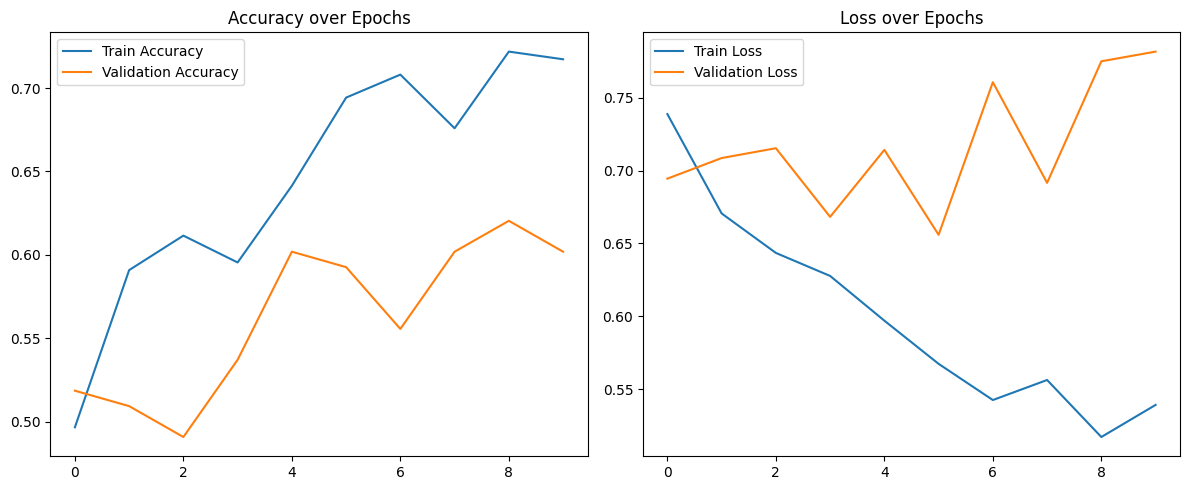

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step

=== Confusion Matrix ===
[[13 39]
 [ 7 49]]

=== Classification Report ===
              precision    recall  f1-score   support

 Not Injured       0.65      0.25      0.36        52
     Injured       0.56      0.88      0.68        56

    accuracy                           0.57       108
   macro avg       0.60      0.56      0.52       108
weighted avg       0.60      0.57      0.53       108



In [ ]:
# === Imports ===
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# === Paths ===
dataset_path = 'test'  # This folder should contain: injured_animals/ and not_injured_animals/

# === Image Loading with Balanced Augmentation ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# === Confirm Class Labels ===
print("Class indices:", train_generator.class_indices)
# Expected: {'injured_animals': 1, 'not_injured_animals': 0}

# === Define CNN Model ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Train Model ===
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# === Plot Accuracy & Loss ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# === Evaluation ===
val_preds = model.predict(validation_generator)
y_true = validation_generator.classes
y_pred = (val_preds > 0.5).astype(int).flatten()

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Not Injured", "Injured"]))


Found 435 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Class indices: {'injured_animals': 0, 'not_injured_animals': 1}


c:\Users\dany7\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 620ms/step - accuracy: 0.5573 - loss: 0.7513 - val_accuracy: 0.4722 - val_loss: 0.8163
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.5694 - loss: 0.6951 - val_accuracy: 0.5185 - val_loss: 0.7796
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.5943 - loss: 0.6771 - val_accuracy: 0.5093 - val_loss: 0.7290
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 506ms/step - accuracy: 0.6115 - loss: 0.6692 - val_accuracy: 0.5463 - val_loss: 0.7068
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.6300 - loss: 0.6411 - val_accuracy: 0.5648 - val_loss: 0.7003
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 462ms/step - accuracy: 0.6698 - loss: 0.5948 - val_accuracy: 0.6019 - val_loss: 0.7097
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 450ms/step - accuracy: 0.6757 - loss: 0.6124 - val_accuracy: 0.6204 - val_loss: 0.6515
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - accuracy: 0.7011 - loss: 0.5659 - val_accuracy: 0

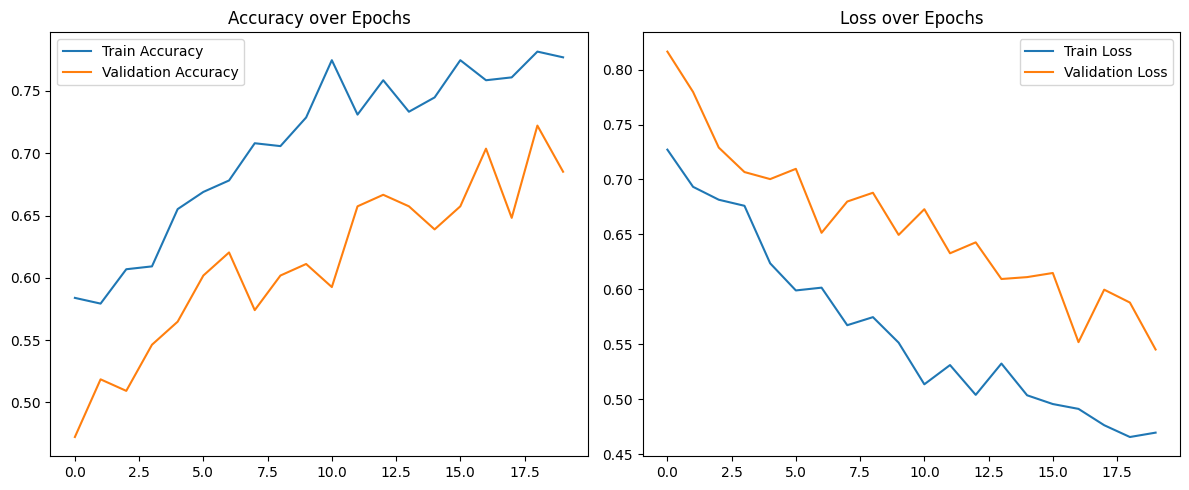

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step

=== Confusion Matrix ===
[[41 11]
 [20 36]]

=== Classification Report ===
              precision    recall  f1-score   support

 Not Injured       0.67      0.79      0.73        52
     Injured       0.77      0.64      0.70        56

    accuracy                           0.71       108
   macro avg       0.72      0.72      0.71       108
weighted avg       0.72      0.71      0.71       108



In [ ]:
# === Imports ===
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# === Paths ===
dataset_path = 'test'  # Should contain: injured_animals/ and not_injured_animals/

# === Image Loading with Enhanced Augmentation ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),  # Larger input size for MobileNetV2
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

print("Class indices:", train_generator.class_indices)

# === Transfer Learning Model: MobileNetV2 ===
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# === Train Model with EarlyStopping ===
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stop]
)

# === Plot Accuracy & Loss ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# === Evaluation ===
val_preds = model.predict(validation_generator).flatten()
y_true = validation_generator.classes
y_pred = (val_preds > 0.5).astype(int)

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Not Injured", "Injured"]))

# === Optional: Tune threshold ===
# precisions, recalls, thresholds = precision_recall_curve(y_true, val_preds)
# plt.plot(thresholds, precisions[:-1], label='Precision')
# plt.plot(thresholds, recalls[:-1], label='Recall')
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Precision-Recall vs Threshold")
# plt.show()


In [ ]:
# === Imports ===
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# === Paths ===
dataset_path = 'test'  # Should contain: injured_animals/ and not_injured_animals/

# === Image Loading with Enhanced Augmentation ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),  # Larger input size for MobileNetV2
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

print("Class indices:", train_generator.class_indices)

# === Transfer Learning Model: MobileNetV2 ===
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# === Train Model with EarlyStopping ===
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop]
)

# === Plot Accuracy & Loss ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# === Evaluation ===
val_preds = model.predict(validation_generator).flatten()
y_true = validation_generator.classes
y_pred = (val_preds > 0.5).astype(int)

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Not Injured", "Injured"]))

# === Optional: Tune threshold ===
# precisions, recalls, thresholds = precision_recall_curve(y_true, val_preds)
# plt.plot(thresholds, precisions[:-1], label='Precision')
# plt.plot(thresholds, recalls[:-1], label='Recall')
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Precision-Recall vs Threshold")
# plt.show()


In [ ]:
print("Not Injured:", len(os.listdir(not_injured_dir)))
print("Injured:", len(os.listdir(injured_dir)))

Not Injured: 282
Injured: 261


In [ ]:
# === Predict on New Image ===
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the image you want to test
test_image_path = 'C:/Users/dany7/OneDrive/Bureau/dataset/test/not_injured_animals/60.jpg'

# Load and preprocess the image
img = load_img(test_image_path, target_size=(160, 160))  # ✅ Correct size
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)[0][0]

# Show result
print("Prediction probability (Injured):", prediction)
if prediction > 0.5:
    print("🟥 Predicted Class: Injured Animal")
else:
    print("🟩 Predicted Class: Not Injured Animal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction probability (Injured): 0.6290759
🟥 Predicted Class: Injured Animal


In [ ]:
import os

dataset_path = 'dataset'
injured_dir = r'"C:\Users\dany7\OneDrive\Bureau\dataset\dataset\injured_cats"'

print("Checking if this folder exists:")
print(injured_dir)
print("Exists:", os.path.isdir(injured_dir))


Checking if this folder exists:
"C:\Users\dany7\OneDrive\Bureau\dataset\dataset\injured_cats"
Exists: False
